In [158]:
# Import libraries

# Import the functions used in this project

# Pretty display for notebooks
%matplotlib inline


# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
submission = pd.read_csv("../asset/sample_submission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("submission  data : ", submission.shape)

import awesome_functions as af

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_submission = submission.copy()

Train data :  (647054, 7)
Test  data :  (653646, 6)
submission  data :  (95674, 39)


In [287]:
import private_pkg


TripType 컬럼의 유니크 데이터 정보(36종류)

데이터별 분포


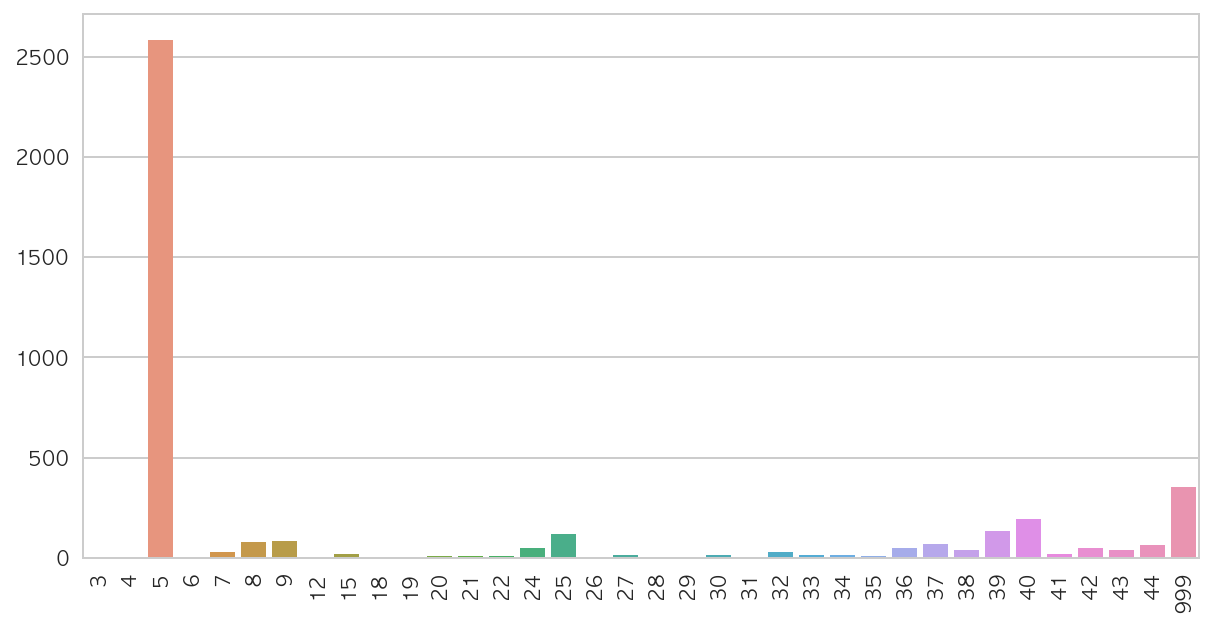

DepartmentDescription이 Null인 경우의 분포


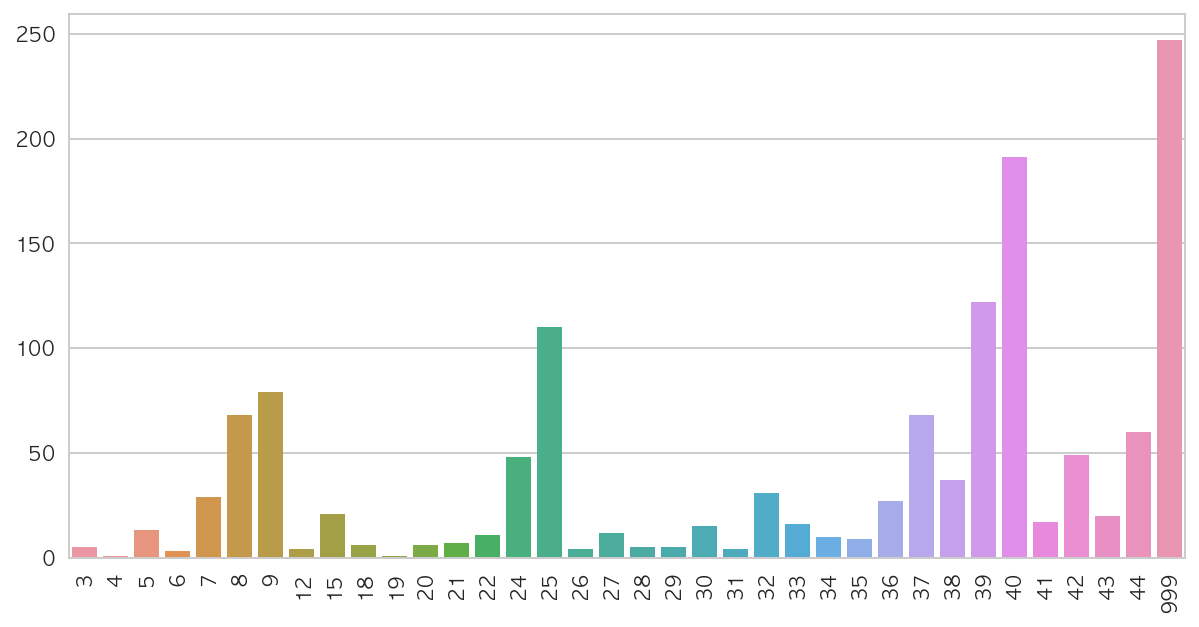

DepartmentDescription이 PHARMACY RX인 경우의 분포


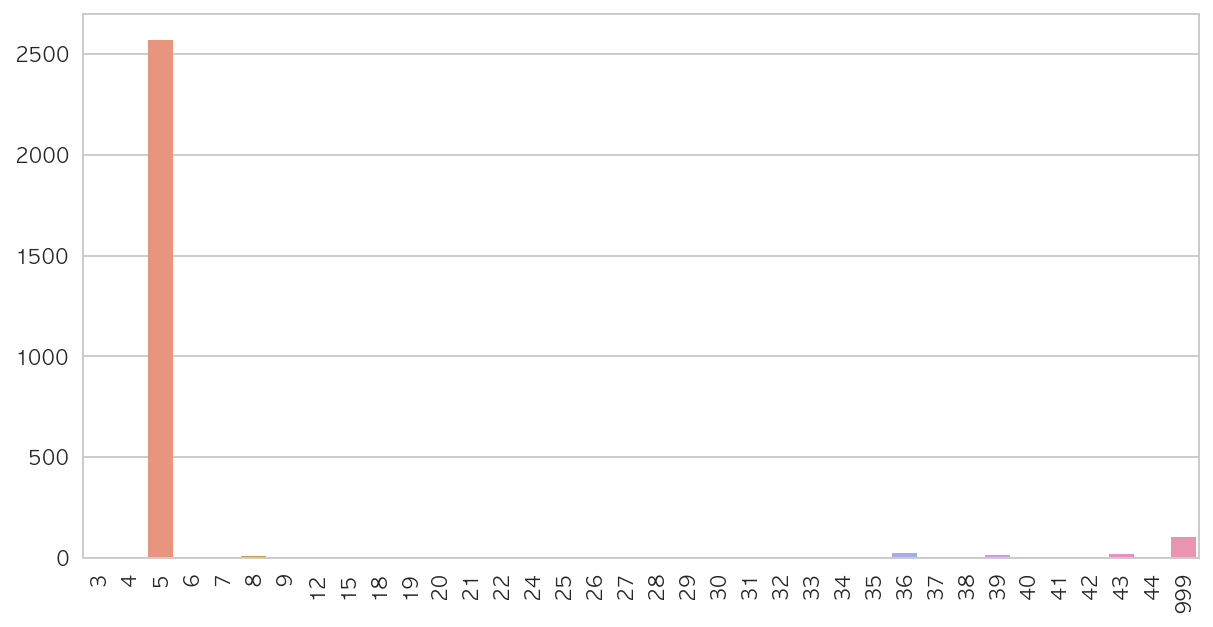

In [288]:
getNullDataDetailInfo(df_train, ["TripType"])

In [ ]:
getNullDataInfo(df_train)

In [144]:
getNullDataInfo(df_test)

,Feature_name,Sum of null data
0,VisitNumber,0
1,Weekday,0
2,Upc,3986
3,ScanCount,0
4,DepartmentDescription,1328
5,FinelineNumber,3986


In [132]:
for boo in df_train["VisitNumber"].unique() == df_test["VisitNumber"].unique():
    if boo == True:
        print("has")

In [4]:
dd_unique = df_train["DepartmentDescription"].unique()

In [87]:
df_list_fl = []

In [53]:
df_list = []
for dd in dd_unique:
    if type(dd) is not float:
        df_list.append(df_train[df_train["DepartmentDescription"] == dd])

In [88]:
fl_unique = df_train["FinelineNumber"].unique()

In [89]:
for fl in fl_unique:
    if not np.isnan(fl):
        df_list_fl.append(df_train[df_train["FinelineNumber"] == fl])

In [119]:
df_dd_nan = df_train[df_train["dd_flag"] == 1]

In [123]:
li = df_dd_nan["TripType"].unique()

In [15]:
df_train["dd_flag"] = df_train["DepartmentDescription"].apply(lambda a: type(a) is float and 1 or 0)

In [42]:
len(df_upc_nan["VisitNumber"].unique())

2754

In [32]:
df_upc_nan = df_train[np.isnan(df_train["Upc"])]

In [109]:
df_train_pharmacy = df_train[df_train["DepartmentDescription"] == "PHARMACY RX"]

In [70]:
df_train_pharmacy_upc_unique = df_train[df_train["DepartmentDescription"] == "PHARMACY RX"]["Upc"].unique()

In [111]:
li = df_train_pharmacy["FinelineNumber"].unique()

In [113]:
for l in li:
    print(l, len(df_train_pharmacy[df_train_pharmacy["FinelineNumber"] == l]))

nan 0
4822.0 84
1335.0 6
5615.0 63
1336.0 1


In [114]:
84+6+63+1

154

In [116]:
upc_li = []
fl_li = []
len_li = []
for upc in df_train_pharmacy_upc_unique:
    upc_li.append(upc)
    fl_li.append(df_train[df_train["Upc"] == upc]["FinelineNumber"].unique()[0])
    len_li.append(len(df_train[df_train["Upc"] == upc]))
upc_fl_dict = dict(zip(upc_li, fl_li))
pr_upc_len_dict = dict(zip(upc_li, len_li))

In [117]:
pr_upc_len_dict

{30169183402.0: 32,
 30169183302.0: 18,
 30169183702.0: 34,
 68130604702.0: 2,
 68113131170.0: 6,
 68113131174.0: 8,
 68113131171.0: 6,
 38290491101.0: 3,
 68113131178.0: 8,
 68113131172.0: 6,
 68113131169.0: 6,
 68113131165.0: 1,
 68113131175.0: 1,
 60551129572.0: 2,
 68113131166.0: 3,
 68113131179.0: 3,
 68113131163.0: 2,
 68113131176.0: 2,
 68113117574.0: 2,
 68113131173.0: 4,
 38290324911.0: 2,
 68113131168.0: 1,
 38290320122.0: 1,
 68113131177.0: 1}

In [86]:
df_train[df_train["FinelineNumber"] == 1336.0]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,dd_flag
413531,5,122721,Wednesday,3.829032e+10,1,PHARMACY RX,1336.0,0


In [80]:
set(fl_li) 

{1335.0, 1336.0, 4822.0, 5615.0}

In [77]:
upc_fl_dict

{30169183402.0: 4822.0,
 30169183302.0: 4822.0,
 30169183702.0: 4822.0,
 68130604702.0: 1335.0,
 68113131170.0: 5615.0,
 68113131174.0: 5615.0,
 68113131171.0: 5615.0,
 38290491101.0: 5615.0,
 68113131178.0: 5615.0,
 68113131172.0: 5615.0,
 68113131169.0: 5615.0,
 68113131165.0: 5615.0,
 68113131175.0: 5615.0,
 60551129572.0: 1335.0,
 68113131166.0: 5615.0,
 68113131179.0: 5615.0,
 68113131163.0: 5615.0,
 68113131176.0: 5615.0,
 68113117574.0: 1335.0,
 68113131173.0: 5615.0,
 38290324911.0: 5615.0,
 68113131168.0: 5615.0,
 38290320122.0: 1336.0,
 68113131177.0: 5615.0}

In [118]:
len(df_upc_nan)

4129

In [67]:
df_train[df_train["DepartmentDescription"] == "PHARMACY RX"]["FinelineNumber"].unique()

array([  nan, 4822., 1335., 5615., 1336.])

In [55]:
len(df_upc_nan[df_upc_nan["DepartmentDescription"] == "PHARMACY RX"]["Upc"].unique())

1

In [61]:
len(df_upc_nan)

4129

In [60]:
len(df_upc_nan) - len(df_upc_nan[df_upc_nan["DepartmentDescription"] == "PHARMACY RX"])

1361

In [62]:
df_upc_nan_dd_pharmacy = df_upc_nan[df_upc_nan["DepartmentDescription"] == "PHARMACY RX"]

In [63]:
len(df_upc_nan_dd_pharmacy[df_upc_nan_dd_pharmacy["TripType"] == 5])

2570

In [66]:
df_upc_nan_dd_pharmacy["FinelineNumber"].unique()

array([nan])

In [64]:
len(df_upc_nan_dd_pharmacy)

2768

In [65]:
2570/2768

0.9284682080924855

In [6]:
dd_unique_wto_nan = []

In [90]:
fl_unique_wto_nan = []

In [7]:
unique_nbr = 0
unique_li = []
for df in df_list:
    dd_unique_wto_nan.append(df["DepartmentDescription"].unique()[0])
    nbr = len(df["Upc"].unique())
    unique_li.append(nbr)
    unique_nbr += nbr

In [91]:
fl_unique_nbr = 0
fl_unique_li = []
for df in df_list_fl:
    fl_unique_wto_nan.append(df["FinelineNumber"].unique()[0])
    nbr = len(df["Upc"].unique())
    fl_unique_li.append(nbr)
    fl_unique_nbr += nbr    

In [107]:
sum(fl_unique_li)

97727

In [102]:
len(df_train["Upc"].unique())

97715

In [8]:
len(dd_unique_wto_nan)

68

In [9]:
arr_unique_li = np.array(unique_li)

In [11]:
dd_dict = dict(zip(dd_unique_wto_nan, unique_li))

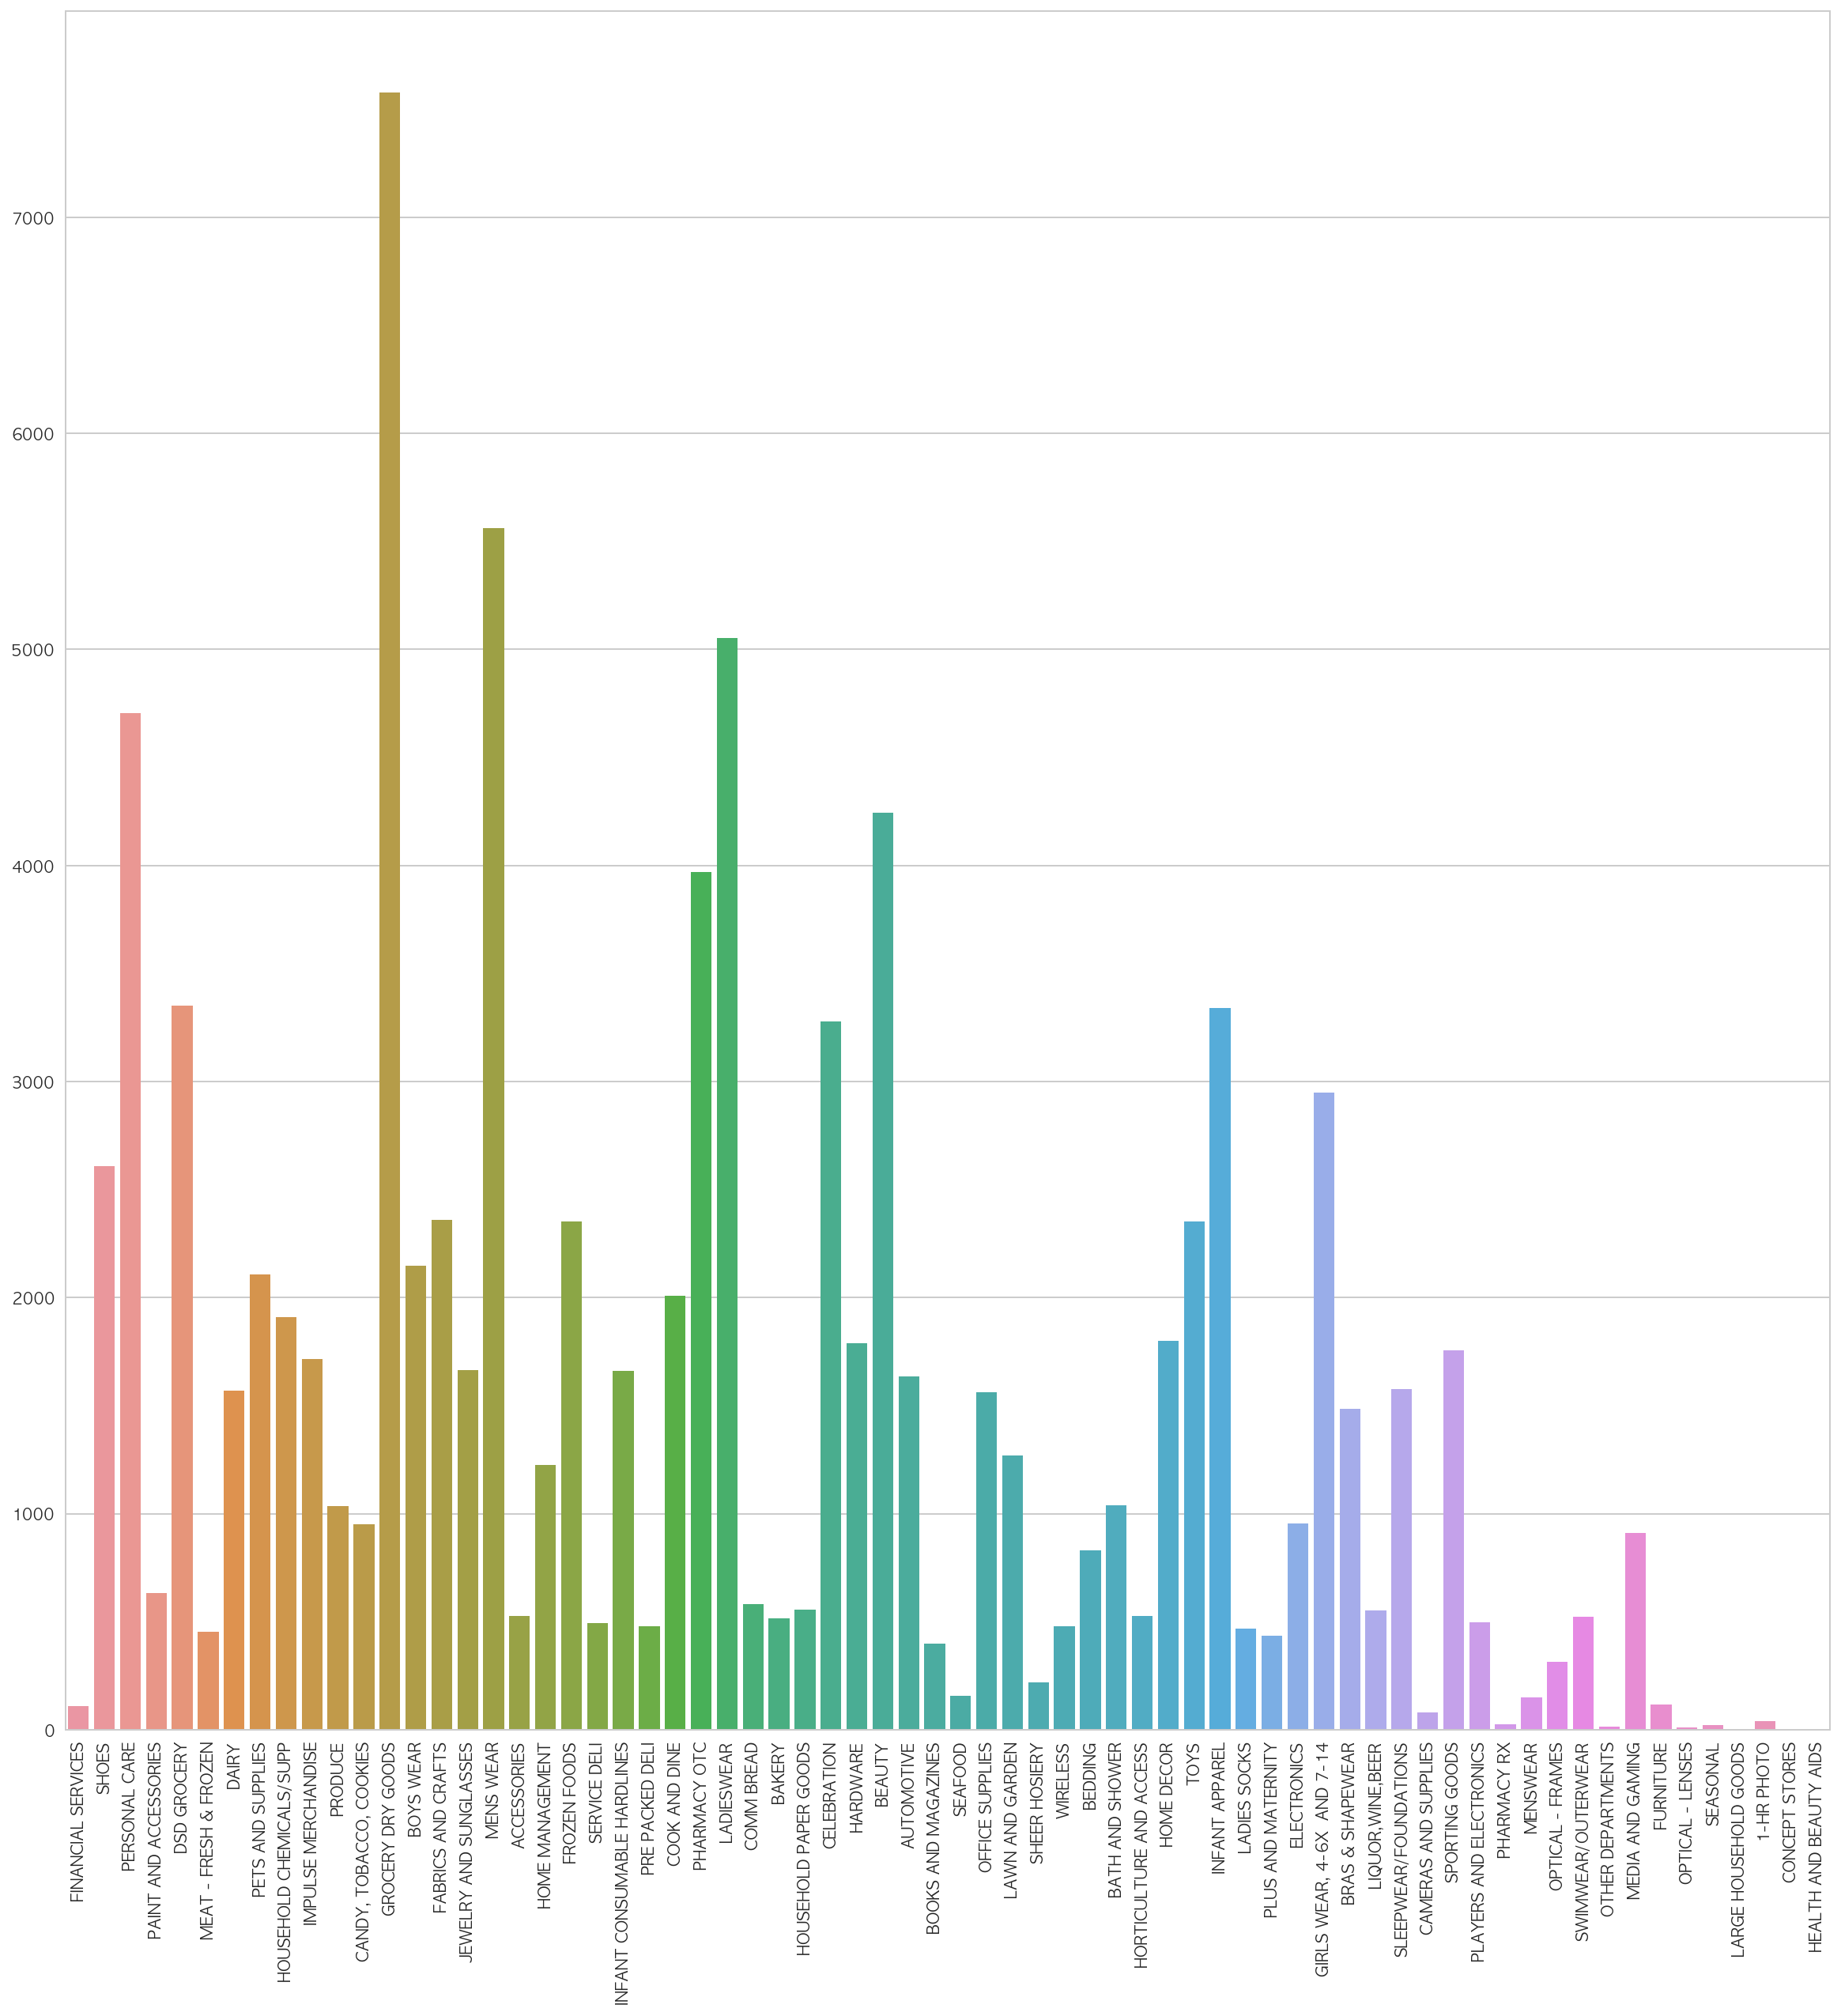

In [12]:
plt.figure(figsize=(20, 20))
sns.barplot(x = list(dd_dict.keys()), y = list(dd_dict.values()))
plt.xticks(rotation=90)
plt.show()

In [13]:
def changeType(data):
    day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return int(day.index(data))

In [24]:
X["Weekday"] = X["Weekday"].apply(changeType)

In [46]:
X_ = X[['VisitNumber', 'Weekday', 'Upc', 'ScanCount', 'FinelineNumber']]

In [47]:
model.fit(X_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=38, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
target = model.predict(X_)

In [53]:
df_train_ = df_train.dropna()

In [66]:
target_predicted = pd.DataFrame(target, columns = ["target"])

In [68]:
test = pd.concat([df_train_, target_predicted], axis=1)

In [83]:
test["target"] = test["target"].apply(lambda a : int(a) if not np.isnan(a) else 0)

In [93]:
target_li = sorted(test["target"].unique())